# Lesson 3 Assignment - Monty Hall Simulation
## Author - Nourhan El Zarif

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

## Distribution Type for Monty Hall

The problem presented to us represents a Bernouli Distribution, a binary discrete output. We either win a car, or a goat. 
We can represent the car as x = 1, and the goat as x = 0. The probability of getting a car is p = 1/3. 

## Importing libraries

In [1]:
# Import libraries
import numpy
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Putting the Prizes Behind the Doors

Realistically, producers of the show would place the prizes behind the doors before the contestant picks a door. 

In [2]:
# this function creates a data frame that represents putting prizes behind each door, n times
def doorsSetUp(n):
    #creating a matrix of zeros
    doors_matrix = numpy.zeros(n, dtype=int)
    
    #the car will be placed behind a door randomly, it is reprsented as 1
    for i in range(n):
        doors_matrix[i] = numpy.random.randint(3)
    
    #we will put all this in a dataframe
    doors = pd.DataFrame(doors_matrix, columns = ['car_door'])
    
    return doors


#number of realizations: we're testing the choice 10,000 times 
n = 10000
doors = doorsSetUp(n)
doors.head()

,car_door
0,1
1,0
2,2
3,0
4,0


## Contestant First Pick

The Contestant will randomly pick a door.

In [3]:
#this function creates an array (of length n) of random ints from value [0,2]
def firstPick(n):
    return numpy.random.randint(3, size = n)

doors['first_pick']=firstPick(n)

doors.head()

,car_door,first_pick
0,1,2
1,0,0
2,2,2
3,0,0
4,0,2


Text(0.5, 0, 'Door Number')

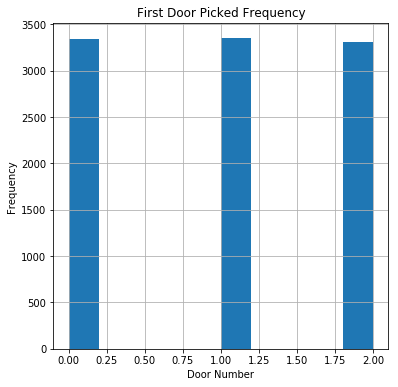

In [4]:
#I will plot  a hist of first picks 
ax = plt.figure(figsize = (6,6)).gca()
doors.loc[:, 'first_pick'].hist(ax=ax)
ax.set_title('First Door Picked Frequency') 
ax.set_ylabel('Frequency')
ax.set_xlabel('Door Number')

This histogram shows that the contestant's choice of a door is uniform. 

### Checking if the Contestant's First Pick is a Car
This step will help us determine which door Monty will have to open.

In [5]:
winningDoor = numpy.zeros(n, dtype = int)
#Did the contestant choose the door with the car?
for r in range(n):
    winningDoor[r] = (doors.loc[r, 'car_door'] == doors.loc[r, 'first_pick'])

doors['firstPickIsCar'] = winningDoor
doors.head()


,car_door,first_pick,firstPickIsCar
0,1,2,0
1,0,0,1
2,2,2,1
3,0,0,1
4,0,2,0


## Monty Opens 

Monty will open one of the doors that has a goat. This will happen in two ways:

1. If the first pick was a goat, that leaves Monty with one option. That option is opening the door that has the other goat.

2. If the first pick was a car, Monty will have two doors with goats as options. He will then choose one of the two doors randomly. 

In [6]:
#this will be the array that holds the door number that monty  opens
montyChoice = numpy.zeros(n, dtype = int)

for r in range(n):
    #this array holds all the possible doors to open
    #we will eliminate the doors monty can't open
    doorsArray = [0, 1, 2]
    
    #if we picked a goat
    if (doors.loc[r,'firstPickIsCar'] == 0):
        doorsArray.remove(doors.loc[r, 'first_pick'])
        doorsArray.remove(doors.loc[r, 'car_door'])
        montyChoice[r] = doorsArray[0]
    
    #if we picked the car
    else:
        doorsArray.remove(doors.loc[r, 'first_pick'])
        montyChoice[r] = doorsArray[numpy.random.randint(2)]



doors['monty_opens'] = montyChoice
doors.head()

,car_door,first_pick,firstPickIsCar,monty_opens
0,1,2,0,0
1,0,0,1,2
2,2,2,1,1
3,0,0,1,1
4,0,2,0,1


Now the contestant will have to make the choice of sticking with the first pick, or swithcing doors. 


## Case 1: Not Switching

If the contest does not switch, the result is the same from what was computed earlier. 

In [7]:
doors['not_switching_result'] = doors.loc[:, 'firstPickIsCar']
doors.head()

,car_door,first_pick,firstPickIsCar,monty_opens,not_switching_result
0,1,2,0,0,0
1,0,0,1,2,1
2,2,2,1,1,1
3,0,0,1,1,1
4,0,2,0,1,0


### Histogram

The histograms shows that the car was NOT won most of the time. The contestant only wins a car about 1/3 of the time. This result is consistant with the probability we expected. 

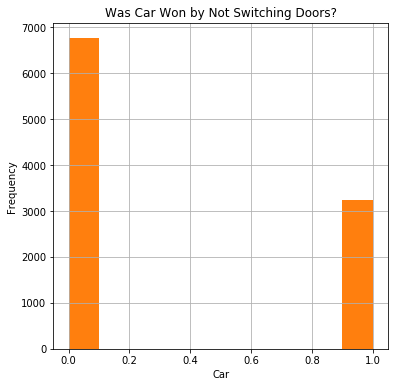

In [8]:
ax = plt.figure(figsize = (6,6)).gca()
doors.loc[:, 'not_switching_result'].hist(ax=ax)
ax.set_title('Was Car Won by Not Switching Doors?') 
ax.set_ylabel('Frequency')
ax.set_xlabel('Car')

doors.loc[:, 'not_switching_result'].hist()

### Summary Statistics

In [9]:
#mean
print(numpy.mean(doors.loc[:, 'not_switching_result']))

#variance
print(numpy.var(doors.loc[:, 'not_switching_result']))

0.3239
0.2189887899999802


The simulation's mean, with n = 10000,  is close to 33% as we'd expect.  

## Case 2 : Switching
Now we need to determine which door the contestant will open if they decide to switch doors.

In [10]:
#this will be the array that holds the switched door number 
secondPick = numpy.zeros(n, dtype = int)

for r in range(n):
    #this array holds all the possible doors to open
    #we will eliminate first pick, and the door monty opened
    doorsArray = [0, 1, 2]
    
    doorsArray.remove(doors.loc[r, 'first_pick'])
    doorsArray.remove(doors.loc[r, 'monty_opens'])
    secondPick[r] = doorsArray[0]
    


doors['switching_door'] = secondPick


doors['switching_result'] = (doors.loc[:,'switching_door'] == doors.loc[:, 'car_door']).astype(int)
doors.head()

,car_door,first_pick,firstPickIsCar,monty_opens,not_switching_result,switching_door,switching_result
0,1,2,0,0,0,1,1
1,0,0,1,2,1,1,0
2,2,2,1,1,1,0,0
3,0,0,1,1,1,2,0
4,0,2,0,1,0,0,1


### Histogram

This histogram shows the car was won about 2/3 of the time. 

Text(0.5, 0, 'Car')

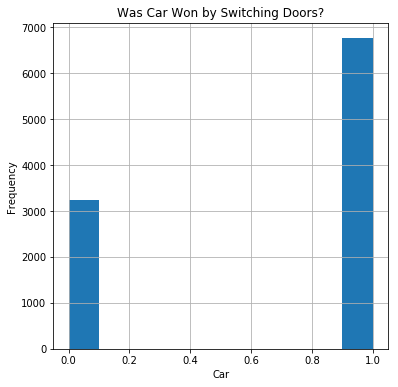

In [11]:
ax = plt.figure(figsize = (6,6)).gca()
doors.loc[:, 'switching_result'].hist(ax=ax)
ax.set_title('Was Car Won by Switching Doors?') 
ax.set_ylabel('Frequency')
ax.set_xlabel('Car')

### Summary Statistics

In [12]:
#mean
print(numpy.mean(doors.loc[:, 'switching_result']))

#variance
print(numpy.var(doors.loc[:, 'switching_result']))

0.6761
0.2189887899999802


The simulation's mean, with n = 10000,  is close to 67% as we'd expect. 

# Conclusion/ Recommended Strategy

Text(0.5, 1.0, 'Comparison of Winning a Car for Both Strategies')

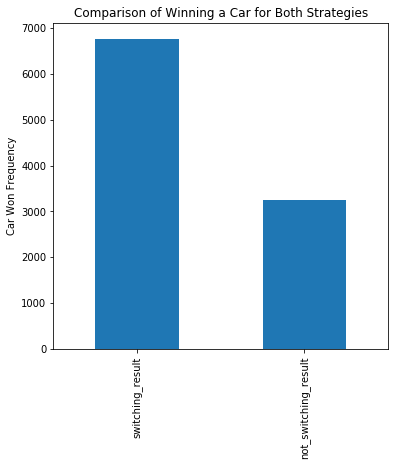

In [13]:
ax = plt.figure(figsize=(6,6)).gca()
doors[['switching_result', 'not_switching_result']].sum().plot.bar(ax=ax)
ax.set_ylabel('Car Won Frequency')
ax.set_title('Comparison of Winning a Car for Both Strategies')

The bar plot above shows the sum of each strategy's winning results. Switching has resulted in winning a car ~6,600 times. Not switching has resulted in winning a car ~3,400 times. 

## Recommended Strategy: Switching
Based on simulating this 10,000 times, switching doors appears to be the best strategy to win a car.